<a href="https://colab.research.google.com/github/ArturoG1z/Proyecto-Modulo-3-CyAD/blob/main/Notebook/proyecto_modulo_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Modulo 3


<a href="https://colab.research.google.com/github/ArturoG1z/Proyecto-Modulo-3-CyAD/blob/main/Notebook/proyecto_modulo_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import pandas as pd
import cufflinks as cf
# from IPython.display import display
# cf.set_config_file(sharing='public', theme='pearl', offline=True)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
# ruta = '/content/drive/MyDrive/Colab Notebooks/PROYECTO/data set con color.xlsx'
# ruta = './data set Proyecto.xlsx'
ruta = './SEDUCA-2023B.xlsx'
df_original = pd.read_excel(ruta)

In [ ]:
df_original.head()

,Unnamed: 0,carrera,No.,Asesor,Comunidad,Espacio_Académico,Bloque,Grupo,alumnos,1er_P_Ponderación-semanas,...,Porcentaje-Eficiencia-Terminal,Aprobados,correos_enviados,correos_recibidos,Aprobados ordinario,Aprobados extraordinario,Aprobados título,Asesoría académica Respondidas/Recibidas,Histórico de chat personal,Histórico de socializa por comunidad
0,1,Ingeniería en Computación,1,NaN,69142 Inglés 8 / D2,Valle de Chalco,0,O5,35,100\4,...,0.0,0.0,NaN,1.0,0.0,0.0,0.0,0\0,0.0,0.0
1,2,Ingeniería en Computación,2,NaN,69133 Inglés 6 / C2,Valle de Chalco,0,OB,25,60\6,...,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0\0,0.0,0.0
2,3,Ingeniería en Computación,3,NaN,69143 Inglés 8 / D2,Valle de Chalco,0,O6,23,60\6,...,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0\0,0.0,0.0
3,4,Ingeniería en Computación,4,NaN,69132 Inglés 6 / C2,Valle de Chalco,0,OA,37,100\5,...,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0\0,0.0,0.0
4,5,Ingeniería en Computación (2019),1,NaN,68487 Inglés 8 / D2,CU Texcoco,0,D4,50,9\9,...,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0\0,0.0,0.0


In [ ]:
df_original.shape

(1773, 39)

## Limpieza de los datos

### Eliminar columnas innecesarias

In [ ]:
# remove last 6 columns and first column
df_original = df_original.iloc[:, :-6]
df_original = df_original.iloc[:, 1:]

In [ ]:
df_original.dtypes

carrera                                         object
No.                                              int64
Asesor                                         float64
Comunidad                                       object
Espacio_Académico                               object
Bloque                                           int64
Grupo                                           object
alumnos                                          int64
1er_P_Ponderación-semanas                       object
1p_total_actividades_asignadas                   int64
1p_total_actividades_evaluativas                 int64
1p_porcentaje_evidencias_calificadas           float64
1p_total_actividades_calificadas                 int64
1p_total_actividades_entregadas                float64
1p_porcentaje_evidencias_calificadas_tiempo    float64
1p_total_actividades_calificadas_tiempo        float64
1p_porcentaje_aprobados                          int64
2oP_Ponderación-semanas                         object
2p_total_a

In [ ]:
quitar = [
  'Asesor',
  'Bloque',
  'Grupo',
  'Porcentaje-Eficiencia-Terminal',
]

#print(columnas)
df = df_original.drop(quitar, axis=1)

# Eliminando el ID de la materia en la columna 'Comunidad'
df['Comunidad'] = df['Comunidad'].str[5:]
df.head()

,carrera,No.,Comunidad,Espacio_Académico,alumnos,1er_P_Ponderación-semanas,1p_total_actividades_asignadas,1p_total_actividades_evaluativas,1p_porcentaje_evidencias_calificadas,1p_total_actividades_calificadas,...,2p_total_actividades_calificadas,2p_total_actividades_entregadas,2p_porcentaje_evidencias_calificadas_tiempo,2p_total_actividades_calificadas_tiempo,2p_porcentaje_aprobados,total_actividades_calificadas,trabajos_por_calificar,Aprobados,correos_enviados,correos_recibidos
0,Ingeniería en Computación,1,Inglés 8 / D2,Valle de Chalco,35,100\4,17,17,1.0,583,...,617.0,617.0,0.998,616.0,97.0,1200.0,0.0,0.0,NaN,1.0
1,Ingeniería en Computación,2,Inglés 6 / C2,Valle de Chalco,25,60\6,18,18,1.0,438,...,452.0,452.0,1.000,452.0,0.0,890.0,0.0,0.0,NaN,NaN
2,Ingeniería en Computación,3,Inglés 8 / D2,Valle de Chalco,23,60\6,19,19,1.0,402,...,380.0,380.0,1.000,380.0,0.0,782.0,0.0,0.0,NaN,NaN
3,Ingeniería en Computación,4,Inglés 6 / C2,Valle de Chalco,37,100\5,24,22,1.0,712,...,555.0,555.0,0.829,460.0,81.0,1267.0,0.0,0.0,NaN,NaN
4,Ingeniería en Computación (2019),1,Inglés 8 / D2,CU Texcoco,50,9\9,19,18,1.0,770,...,765.0,765.0,1.000,765.0,0.0,1535.0,0.0,0.0,NaN,NaN


### Separar columnas compuestas

In [ ]:
# Reemplaza los valores NaN por 0
df.fillna(0, inplace=True)

In [ ]:
'''
CONVERT TO INT
1p_total_actividades_entregadas
1p_total_actividades_entregadas
1p_total_actividades_calificadas_tiempo
2p_total_actividades_asignadas
2p_total_actividades_evaluativas
2p_total_actividades_calificadas
2p_total_actividades_entregadas
2p_total_actividades_calificadas_tiempo
total_actividades_calificadas
trabajos_por_calificar
Aprobados
'''
columnas = [
  '1p_total_actividades_entregadas',
  '1p_total_actividades_entregadas',
  '1p_total_actividades_calificadas_tiempo',
  '2p_total_actividades_asignadas',
  '2p_total_actividades_evaluativas',
  '2p_total_actividades_calificadas',
  '2p_total_actividades_entregadas',
  '2p_total_actividades_calificadas_tiempo',
  'total_actividades_calificadas',
  'trabajos_por_calificar',
  'Aprobados',
]

for col in columnas:
  df[col] = df[col].astype(int)

In [ ]:
df.dtypes

carrera                                         object
No.                                              int64
Comunidad                                       object
Espacio_Académico                               object
alumnos                                          int64
1er_P_Ponderación-semanas                       object
1p_total_actividades_asignadas                   int64
1p_total_actividades_evaluativas                 int64
1p_porcentaje_evidencias_calificadas           float64
1p_total_actividades_calificadas                 int64
1p_total_actividades_entregadas                  int64
1p_porcentaje_evidencias_calificadas_tiempo    float64
1p_total_actividades_calificadas_tiempo          int64
1p_porcentaje_aprobados                          int64
2oP_Ponderación-semanas                         object
2p_total_actividades_asignadas                   int64
2p_total_actividades_evaluativas                 int64
2p_porcentaje_evidencias_calificadas           float64
2p_total_a

In [ ]:
# ver rango de valores de cada columna avoiding '<=' not supported between instances of 'str' and 'int' if its object and
for col in df.columns:
  if df[col].dtype == 'object':
    print(col, df[col].unique())
  else:
    print(col, df[col].min(), df[col].max())

carrera ['Ingeniería en Computación' 'Ingeniería en Computación (2019) '
 'Licenciado en Actuaría' 'Licenciado en Administración'
 'Licenciado en Contaduría ' 'Licenciado en Derecho 2023B'
 'Licenciado en Derecho Internacional ' 'Licenciado en enfermería (2015) '
 'Licenciado en enfermería (2022)' 'Licenciado en enseñanza del inglés '
 'Licenciado en enseñanza del inglés' 'Licenciado en Gastronomía'
 'Licenciado en Gestión de la Información en Redes Sociales'
 'Licenciado en Informática Administrativa'
 'Licenciado en Informática Administrativa (2018) '
 'Licenciado en Informática Administrativa (2018)'
 'Licenciado en Logística'
 'Licenciado en medios alternos de solución de conflictos'
 'Licenciado en Negocios Internacionales' 'Licenciado en Nutrición'
 'Licenciado en Relaciones Económicas Internacionales'
 'Licenciado en Seguridad Ciudadana' 'Licenciado en Trabajo Social']
No. 1 207
Comunidad [' Inglés 8 / D2' ' Inglés 6 / C2' ' Matematicas Discretas' ' Física'
 ' Administracion Y S

In [ ]:
# ver valores de 1p_porcentaje_evidencias_calificadas_tiempo mayores a 1
df[df['1p_porcentaje_evidencias_calificadas_tiempo'] > 1]
# show this rows putting the column at first place on a new dataframe
df[df['1p_porcentaje_evidencias_calificadas_tiempo'] > 1][['1p_porcentaje_evidencias_calificadas_tiempo'] + [col for col in df.columns if col != '1p_porcentaje_evidencias_calificadas_tiempo']]

,1p_porcentaje_evidencias_calificadas_tiempo,carrera,No.,Comunidad,Espacio_Académico,alumnos,1er_P_Ponderación-semanas,1p_total_actividades_asignadas,1p_total_actividades_evaluativas,1p_porcentaje_evidencias_calificadas,...,2p_total_actividades_calificadas,2p_total_actividades_entregadas,2p_porcentaje_evidencias_calificadas_tiempo,2p_total_actividades_calificadas_tiempo,2p_porcentaje_aprobados,total_actividades_calificadas,trabajos_por_calificar,Aprobados,correos_enviados,correos_recibidos
1117,27.0,Licenciado en Informática Administrativa,1,Tutoría académica,Contaduría y Administración,36,100,11,249,0.0,...,0,0,0.0,0,0.0,0,0,0,0.0,0.0
1118,28.0,Licenciado en Informática Administrativa,2,Tutoría académica,Contaduría y Administración,29,100,10,217,0.0,...,0,0,0.0,0,0.0,0,0,0,0.0,0.0
1120,6.0,Licenciado en Informática Administrativa,4,PRACTICA PROFESIONAL,Valle de México,2,0,0,10,0.0,...,0,0,0.0,0,0.0,0,0,0,0.0,0.0
1121,3.0,Licenciado en Informática Administrativa,5,Tutoría académica,Contaduría y Administración,34,100,10,16,222.0,...,0,0,0.0,0,0.0,0,0,0,0.0,0.0


In [ ]:
# Dado que  tiene valores mayores a 1, se procede a dividir por 100 dichos valores que son mayores a 1 (df['1p_porcentaje_evidencias_calificadas_tiempo'] > 1)
df['1p_porcentaje_evidencias_calificadas_tiempo'] = df['1p_porcentaje_evidencias_calificadas_tiempo'].apply(lambda x: x / 100 if x > 1 else x)

In [ ]:
''' 1er_P_Ponderación-semanas
2oP_Ponderación-semanas '''
# if is not like this n/n like '100/2' or is int then convert to 0/0
df['1er_P_Ponderación-semanas'] = df['1er_P_Ponderación-semanas'].apply(lambda x: '0\\0' if type(x) == int or '/' not in x else x)
df['2oP_Ponderación-semanas'] = df['2oP_Ponderación-semanas'].apply(lambda x: '0\\0' if type(x) == int or '/' not in x else x)


In [ ]:
# Separando la columna 1er_P_Ponderación-semanas en : 1erPonderacion Semana_1erP splited by '\' and convert to int (nP_ponderacion y nP_semana) n es el parcial colocarlas en la misma posicion donde estaba la columna original

# df[['1p_Ponderacion', '1p_semana']] = df['1er_P_Ponderación-semanas'].str.split('\\', expand=True)
# df['1p_Ponderacion'] = df['1p_Ponderacion'].astype(int)
# df['1p_semana'] = df['1p_semana'].astype(int)
df = df.drop('1er_P_Ponderación-semanas', axis=1)

# # Separando la columna 2oP_Ponderación-semanas
# df[['2p_Ponderacion', '2p_semana']] = df['2oP_Ponderación-semanas'].str.split('\\', expand=True)
# df['2p_Ponderacion'] = df['2p_Ponderacion'].astype(int)
# df['2p_semana'] = df['2p_semana'].astype(int)
df = df.drop('2oP_Ponderación-semanas', axis=1)


# df.tail()
#df.shape

In [ ]:

# Cuenta cuántos 0 hay en la columna
numero_ceros_1er = df['1p_porcentaje_aprobados'].value_counts()[0]
numero_ceros_2do = df['2p_porcentaje_aprobados'].value_counts()[0]

# Imprime el número de 0
print(numero_ceros_1er)

# Imprime el número de 0
print(numero_ceros_2do)


880
891


### Obtener nuevas columnas calculadas

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
# get how many 1er P_Actividades asignadas are diferent than 1er P_Actividades evaluativas
# diferent_values = (numerical_df['1p_total_actividades_asignadas'] != numerical_df['1p_total_actividades_evaluativas']).sum()
# print(diferent_values)

# total de actividades asignadas = Alumnos * 1er P_Actividades asignadas
# porcentaje as float64
df['1p_total_actividades_esperadas'] = df['alumnos'] * df['1p_total_actividades_asignadas']
df['2p_total_actividades_esperadas'] = df['alumnos'] * df['2p_total_actividades_asignadas']
df['total_actividades_asignadas'] = df['1p_total_actividades_asignadas'] + df['2p_total_actividades_asignadas']

In [ ]:
# porcentaje de actividades entregadas = 1p_total_actividades_entregadas / 1p_total_actividades_esperadas
df['1p_porcentaje_actividades_entregadas'] = (df['1p_total_actividades_entregadas'] / df['1p_total_actividades_esperadas']) * 100
df['2p_porcentaje_actividades_entregadas'] = (df['2p_total_actividades_entregadas'] / df['1p_total_actividades_esperadas']) * 100
df['total_actividades_entregadas'] = df['1p_total_actividades_entregadas'] + df['2p_total_actividades_entregadas']
df['porcentaje_actividades_entregadas'] = ((df['1p_total_actividades_entregadas'] + df['2p_total_actividades_entregadas']) / df['total_actividades_asignadas'])
# change nan values to 0
df.fillna(0, inplace=True)

# replace inf values to 0
df.replace([np.inf, -np.inf], 0, inplace=True)

# convert each column to dtype float64
df['1p_porcentaje_actividades_entregadas'] = df['1p_porcentaje_actividades_entregadas'].astype(float)
df['2p_porcentaje_actividades_entregadas'] = df['2p_porcentaje_actividades_entregadas'].astype(float)
df['porcentaje_actividades_entregadas'] = df['porcentaje_actividades_entregadas'].astype(float)

In [ ]:
df[df['1p_porcentaje_actividades_entregadas'] > 100].loc[:, ['1p_porcentaje_actividades_entregadas', '1p_total_actividades_entregadas', '1p_total_actividades_asignadas', 'alumnos']]

,1p_porcentaje_actividades_entregadas,1p_total_actividades_entregadas,1p_total_actividades_asignadas,alumnos
1049,107.5,129,4,30


In [ ]:
df[df['1p_porcentaje_evidencias_calificadas'] > 1].loc[:, ['1p_porcentaje_evidencias_calificadas', '1p_total_actividades_entregadas','1p_total_actividades_calificadas', '1p_total_actividades_asignadas', 'alumnos']]

,1p_porcentaje_evidencias_calificadas,1p_total_actividades_entregadas,1p_total_actividades_calificadas,1p_total_actividades_asignadas,alumnos
1121,222.0,0,0,10,34


In [ ]:
# remove row with index 1121
df = df.drop(1121)

In [ ]:
df.head()

,carrera,No.,Comunidad,Espacio_Académico,alumnos,1p_total_actividades_asignadas,1p_total_actividades_evaluativas,1p_porcentaje_evidencias_calificadas,1p_total_actividades_calificadas,1p_total_actividades_entregadas,...,Aprobados,correos_enviados,correos_recibidos,1p_total_actividades_esperadas,2p_total_actividades_esperadas,total_actividades_asignadas,1p_porcentaje_actividades_entregadas,2p_porcentaje_actividades_entregadas,total_actividades_entregadas,porcentaje_actividades_entregadas
0,Ingeniería en Computación,1,Inglés 8 / D2,Valle de Chalco,35,17,17,1.0,583,583,...,0,0.0,1.0,595,665,36,97.983193,103.697479,1200,33.333333
1,Ingeniería en Computación,2,Inglés 6 / C2,Valle de Chalco,25,18,18,1.0,438,438,...,0,0.0,0.0,450,475,37,97.333333,100.444444,890,24.054054
2,Ingeniería en Computación,3,Inglés 8 / D2,Valle de Chalco,23,19,19,1.0,402,402,...,0,0.0,0.0,437,460,39,91.990847,86.956522,782,20.051282
3,Ingeniería en Computación,4,Inglés 6 / C2,Valle de Chalco,37,24,22,1.0,712,712,...,0,0.0,0.0,888,740,44,80.180180,62.500000,1267,28.795455
4,Ingeniería en Computación (2019),1,Inglés 8 / D2,CU Texcoco,50,19,18,1.0,770,770,...,0,0.0,0.0,950,1050,40,81.052632,80.526316,1535,38.375000


### Filas con valores nulos

In [ ]:
# search for nan values in numerical_df
nan_values = df.isna().sum()
print(nan_values)

carrera                                        0
No.                                            0
Comunidad                                      0
Espacio_Académico                              0
alumnos                                        0
1p_total_actividades_asignadas                 0
1p_total_actividades_evaluativas               0
1p_porcentaje_evidencias_calificadas           0
1p_total_actividades_calificadas               0
1p_total_actividades_entregadas                0
1p_porcentaje_evidencias_calificadas_tiempo    0
1p_total_actividades_calificadas_tiempo        0
1p_porcentaje_aprobados                        0
2p_total_actividades_asignadas                 0
2p_total_actividades_evaluativas               0
2p_porcentaje_evidencias_calificadas           0
2p_total_actividades_calificadas               0
2p_total_actividades_entregadas                0
2p_porcentaje_evidencias_calificadas_tiempo    0
2p_total_actividades_calificadas_tiempo        0
2p_porcentaje_aproba

In [ ]:
# search for 0 values in numerical_df
zero_values = (df == 0).sum()
print(zero_values)

carrera                                           0
No.                                               0
Comunidad                                         0
Espacio_Académico                                 0
alumnos                                           0
1p_total_actividades_asignadas                  643
1p_total_actividades_evaluativas                655
1p_porcentaje_evidencias_calificadas            719
1p_total_actividades_calificadas                716
1p_total_actividades_entregadas                 697
1p_porcentaje_evidencias_calificadas_tiempo     798
1p_total_actividades_calificadas_tiempo         798
1p_porcentaje_aprobados                         879
2p_total_actividades_asignadas                  673
2p_total_actividades_evaluativas                690
2p_porcentaje_evidencias_calificadas            756
2p_total_actividades_calificadas                756
2p_total_actividades_entregadas                 732
2p_porcentaje_evidencias_calificadas_tiempo     811
2p_total_act

In [ ]:
# numero de registros que cumplen con la condicion de que todas las columnas que se pasan como parametro son 0
def count_zeros(df, columns):
  return (df[columns] == 0).all(axis=1).sum()


In [ ]:
# num of rows with 0 in each column 1p_total_actividades_asignadas and 1p_porcentaje_aprobados
count_zeros(df, ['1p_total_actividades_asignadas', '1p_porcentaje_aprobados', '2p_total_actividades_asignadas', '2p_porcentaje_aprobados'])

622

In [ ]:
relacion_datos_vacios = pd.DataFrame({
  '1p_con_actividades_asignadas_2p_sin_actividades_asignadas': df[(df['1p_total_actividades_asignadas'] == 0) & (df['2p_total_actividades_asignadas'] > 0)].shape[0],
  '1p_sin_actividades_asignadas_2p_con_actividades_asignadas': df[(df['2p_total_actividades_asignadas'] == 0) & (df['1p_total_actividades_asignadas'] > 0)].shape[0],
  '1p_sin_porcentaje_aprobados_2p_con_porcentaje_aprobados': df[(df['1p_porcentaje_aprobados'] == 0) & (df['2p_porcentaje_aprobados'] > 0)].shape[0],
  '1p_con_porcentaje_aprobados_2p_sin_porcentaje_aprobados': df[(df['2p_porcentaje_aprobados'] == 0) & (df['1p_porcentaje_aprobados'] > 0)].shape[0],
}, index=[0])

display(relacion_datos_vacios)


,1p_con_actividades_asignadas_2p_sin_actividades_asignadas,1p_sin_actividades_asignadas_2p_con_actividades_asignadas,1p_sin_porcentaje_aprobados_2p_con_porcentaje_aprobados,1p_con_porcentaje_aprobados_2p_sin_porcentaje_aprobados
0,21,51,28,39


In [ ]:
df_sin_participacion = df[((df['1p_total_actividades_asignadas'] == 0) & (df['1p_porcentaje_aprobados'] == 0) & (df['2p_total_actividades_asignadas'] == 0) & (df['2p_porcentaje_aprobados'] == 0))]
df_sin_participacion.shape

(622, 33)

In [ ]:
# remove rows with 0 in ['1p_total_actividades_asignadas', '1p_porcentaje_aprobados', '2p_total_actividades_asignadas', '2p_porcentaje_aprobados']
df = df[~((df['1p_total_actividades_asignadas'] == 0) & (df['1p_porcentaje_aprobados'] == 0) & (df['2p_total_actividades_asignadas'] == 0) & (df['2p_porcentaje_aprobados'] == 0))]

In [ ]:
df.shape

(1150, 33)

In [ ]:
count_zeros(df, ['1p_porcentaje_aprobados'])

257

In [ ]:
count_zeros(df, ['2p_porcentaje_aprobados'])

268

## Entrenar modelo


In [ ]:
# Split df into categorical df and numerical df first 4 columns are categorical and the rest are numerical
categorical_df = df.iloc[:, :4]
numerical_df = df.iloc[:, 4:]

In [ ]:
categorical_features = categorical_df.columns
numerical_features = numerical_df.columns

In [ ]:
numerical_features

Index(['alumnos', '1p_total_actividades_asignadas',
       '1p_total_actividades_evaluativas',
       '1p_porcentaje_evidencias_calificadas',
       '1p_total_actividades_calificadas', '1p_total_actividades_entregadas',
       '1p_porcentaje_evidencias_calificadas_tiempo',
       '1p_total_actividades_calificadas_tiempo', '1p_porcentaje_aprobados',
       '2p_total_actividades_asignadas', '2p_total_actividades_evaluativas',
       '2p_porcentaje_evidencias_calificadas',
       '2p_total_actividades_calificadas', '2p_total_actividades_entregadas',
       '2p_porcentaje_evidencias_calificadas_tiempo',
       '2p_total_actividades_calificadas_tiempo', '2p_porcentaje_aprobados',
       'total_actividades_calificadas', 'trabajos_por_calificar', 'Aprobados',
       'correos_enviados', 'correos_recibidos',
       '1p_total_actividades_esperadas', '2p_total_actividades_esperadas',
       'total_actividades_asignadas', '1p_porcentaje_actividades_entregadas',
       '2p_porcentaje_actividades_en

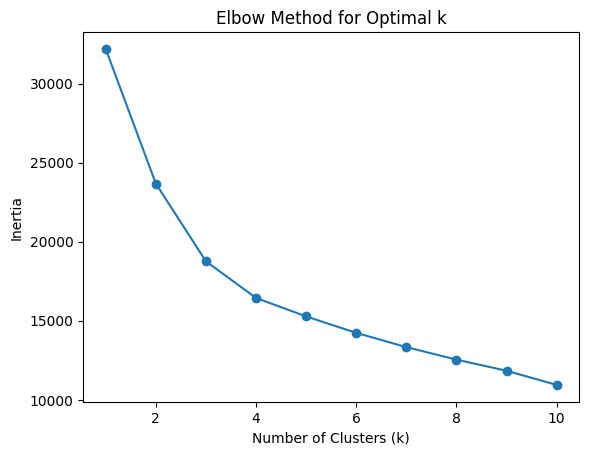

In [ ]:
import plotly.express as px

# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(numerical_df)

# Create a PCA instance: pca
# pca = PCA(n_components=3)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_std)

# Save components to a DataFrame
# PCA_components = pd.DataFrame(principalComponents, columns=['pca1', 'pca2', 'pca3'])
PCA_components = pd.DataFrame(principalComponents, columns=['pca1', 'pca2'])

# df.head()

# Concatenate the DataFrames
df_final = pd.concat([PCA_components, df], axis=1)

# Create a KMeans instance with 3 clusters: model
inercia = []
for k in range(1, 11):
  model = KMeans(n_clusters=k, n_init=10)
  # dont show output
  model.fit(X_std, y=None)
  inercia.append(model.inertia_)

plt.plot(range(1, 11), inercia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3, n_init=10)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(X_std)

# Create a DataFrame with labels and species as columns: df

df_final['cluster'] = 'Cluster ' + pd.Series(labels).astype(str)
df_final.head()

# See cluster with pca

# fig = px.scatter_3d(df_final, x='pca1', y='pca2', z='pca3', color='cluster')
fig = px.scatter(df_final, x='pca1', y='pca2', color='cluster')
# increase the graph size
fig.update_layout(
  title='Clusters',
  scene={
      "xaxis":{"title":'PCA 1'},
      "yaxis":{"title":'PCA 2'},
  },
      # zaxis=dict(title='PCA 3')
  margin={"l":0, "r":0, "b":0, "t":0},
  height=800,
  width=800
)
fig.show()





In [ ]:
df_final.dtypes

pca1                                           float64
pca2                                           float64
carrera                                         object
No.                                            float64
Comunidad                                       object
Espacio_Académico                               object
alumnos                                        float64
1p_total_actividades_asignadas                 float64
1p_total_actividades_evaluativas               float64
1p_porcentaje_evidencias_calificadas           float64
1p_total_actividades_calificadas               float64
1p_total_actividades_entregadas                float64
1p_porcentaje_evidencias_calificadas_tiempo    float64
1p_total_actividades_calificadas_tiempo        float64
1p_porcentaje_aprobados                        float64
2p_total_actividades_asignadas                 float64
2p_total_actividades_evaluativas               float64
2p_porcentaje_evidencias_calificadas           float64
2p_total_a

## GEMINI: Para interpretar los clusters obtenidos a partir de los datos de rendimiento de grupos universitarios en una plataforma educativa virtual, puedes utilizar las siguientes técnicas:

### 1. Visualización:

- Gráficos de dispersión: Crea gráficos de dispersión para cada par de variables relevantes. Colorea los puntos de acuerdo al cluster al que pertenecen. Busca patrones y relaciones entre las variables que diferencian los clusters.
- Gráficos de radar: Para cada cluster, crea un gráfico de radar que muestre el valor promedio de cada variable para ese cluster. Esto te permitirá visualizar las fortalezas y debilidades de cada cluster en comparación con los demás.
- Análisis de componentes principales (PCA): Reduce la dimensionalidad de los datos y visualiza las relaciones entre las variables y los clusters en un espacio bidimensional.

### 2. Análisis estadístico:

- Pruebas de hipótesis: Compara las medias de las variables entre los clusters para determinar si existen diferencias significativas.
- Análisis de varianza (ANOVA): Investiga si existe una relación significativa entre las variables y los clusters.
- Cálculo de medidas de distancia: Calcula la distancia entre los clusters utilizando diferentes métricas como la distancia euclidiana o la distancia de Mahalanobis.

### 3. Interpretación:

- Identifica las características que definen a cada cluster: Busca las variables que tienen mayor diferencia entre los clusters.
- Nombra los clusters: Asigna un nombre descriptivo a cada cluster basado en sus características.
- Relaciona los clusters con el contexto: Interpreta los resultados en el contexto de la plataforma educativa virtual y del rendimiento de los grupos.

Herramientas:

- Librerías de Python: Puedes utilizar librerías como matplotlib, seaborn, scikit-learn y pandas para realizar los análisis y visualizaciones.
- Software estadístico: Puedes utilizar software como SPSS, R o SAS para realizar análisis estadísticos más complejos.

Ejemplos de resultados:

- Cluster 1: Alumnos con alta participación (porcentaje de actividades entregadas), pero bajo rendimiento (porcentaje de aprobados).
- Cluster 2: Alumnos con baja participación, pero alto rendimiento.
- Cluster 3: Alumnos con participación y rendimiento promedio.

Recomendaciones:

- Elige las técnicas de análisis y visualización más adecuadas para tus datos y objetivos.
- Considera el contexto de los datos al interpretar los resultados.
- Utiliza diferentes técnicas para obtener una visión completa de los clusters.


## CHAT-GPT: Para interpretar los clusters obtenidos a partir de tus datos de rendimiento de grupos de universidad en una plataforma educativa virtual, puedes utilizar diversas técnicas de visualización y análisis. Aquí te sugiero algunas ideas para obtener gráficos y resultados adecuados:

### 1. Gráficos de dispersión (Scatter plots):
Utiliza gráficos de dispersión para visualizar relaciones entre diferentes variables en tus datos. Puedes representar diferentes variables en los ejes x e y y colorear los puntos según la etiqueta del clúster.
### 2. Gráficos de barras (Bar plots):
Crea gráficos de barras para comparar estadísticas descriptivas entre los clusters. Por ejemplo, puedes graficar el porcentaje de actividades entregadas, el porcentaje de aprobados en el primer y segundo periodo, etc., para cada cluster.
### 3. Matriz de correlación:
Calcula la matriz de correlación entre las diferentes variables y visualiza esta matriz con un mapa de calor. Esto te ayudará a entender las relaciones lineales entre las variables y cómo están relacionadas con los clusters.
### 4. Diagramas de caja (Box plots):
Los diagramas de caja te permiten visualizar la distribución de una variable numérica en diferentes clusters. Puedes crear diagramas de caja para variables como el porcentaje de actividades entregadas, el porcentaje de aprobados, etc.
### 5. Análisis de componentes principales (PCA):
Utiliza PCA para reducir la dimensionalidad de tus datos y visualizar la distribución de los clusters en un espacio de menor dimensión. Esto te permitirá visualizar cómo se agrupan los puntos en función de las principales componentes de variación en tus datos.
### 6. Visualización de perfiles de cluster:
Crea perfiles de cluster calculando las medias de las variables para cada cluster y visualizando estas medias en un gráfico de radar o un gráfico de barras apiladas. Esto te ayudará a comprender las características distintivas de cada cluster.
### 7. Diagramas de dispersión tridimensionales:
Si tienes más de dos variables importantes, considera crear diagramas de dispersión tridimensionales para visualizar la distribución de los clusters en un espacio tridimensional.
Recuerda que la elección de las técnicas de visualización y análisis dependerá de la naturaleza de tus datos y de los objetivos específicos de tu análisis. Experimenta con diferentes tipos de gráficos y métodos de análisis para obtener una comprensión más completa de tus clusters y de los patrones presentes en tus datos.

In [ ]:
# now with df original wee have 3 clusters to interpret the data make 3 dataframes with each cluster  (df_final['cluster']) and see the mean of each cluster
df_by_cluster = df_final.groupby("cluster")
df_by_cluster

In [ ]:
# display total of each cluster
for name, group in df_by_cluster:
  print(name, group.shape)

Cluster 0 (164, 36)
Cluster 1 (103, 36)
Cluster 2 (883, 36)


In [ ]:

# wee have 26 columns that are numerical from numerical_df

# fig = px.scatter(df_final, x='total_actividades_asignadas', y='porcentaje_actividades_entregadas', color='cluster')
# fig.show()
for col in numerical_features:
  fig = px.box(df_final, x='cluster', y=col, title=col)
  # add the mean of each cluster for the column
  fig.add_scatter(x=df_by_cluster[col].mean().index, y=df_by_cluster[col].mean().values, mode='markers', marker=dict(size=10, color='black'), name='media')
  fig.show()
  # imprime un grafico de barras con la media de cada columna por cluster en un solo grafico
  # fig = px.bar(df_by_cluster[col].mean().reset_index(), x='cluster', y=col)
  # fig.show()

  # y un histograma de la columna por cluster
  # fig = px.histogram(df_final, x=col, color='cluster')
  # fig.show()
  #

In [ ]:
descriptions = {}

# get statistics of each cluster
for cluster, data in df_by_cluster:
  print(cluster)
  ## see graphics of each cluster
  """ Con los siguientes datos de un data set sobre rendimiento de grupos de universidad en una plataforma educativa virtual

  alumnos
  total_actividades_asignadas
  porcentaje_actividades_entregadas
  1p_porcentaje_actividades_entregadas
  2p_porcentaje_actividades_entregadas

  1p_total_actividades_calificadas
  1p_porcentaje_evidencias_calificadas_tiempo
  1p_total_actividades_calificadas_tiempo

  2p_total_actividades_calificadas
  2p_porcentaje_evidencias_calificadas_tiempo
  2p_total_actividades_calificadas_tiempo


  1p_porcentaje_aprobados
  2p_porcentaje_aprobados

  correos_enviados
  correos_recibidos

  con los 3 clusters obtenidos que etiquetan a estos datos, como obtener grafico de barras de
  """
  description = data.describe()
  descriptions[cluster] = description
  display(description)

  print('\n\n')
  # correlation matrix only with numerical_features

  cluster_numerical_df = data[numerical_features]
  # correlation matrix
  correlation_matrix = cluster_numerical_df.corr()

  # plot correlation matrix with plotly
  fig = px.imshow(correlation_matrix, title=f'Correlation matrix for cluster {cluster}')
  # increase the graph size
  fig.update_layout(
    title=f'Correlation matrix for cluster {cluster}',
    margin=dict(l=0, r=0, b=0, t=0),
    height=1200
  )
  fig.show()



Cluster 0


,pca1,pca2,No.,alumnos,1p_total_actividades_asignadas,1p_total_actividades_evaluativas,1p_porcentaje_evidencias_calificadas,1p_total_actividades_calificadas,1p_total_actividades_entregadas,1p_porcentaje_evidencias_calificadas_tiempo,...,Aprobados,correos_enviados,correos_recibidos,1p_total_actividades_esperadas,2p_total_actividades_esperadas,total_actividades_asignadas,1p_porcentaje_actividades_entregadas,2p_porcentaje_actividades_entregadas,total_actividades_entregadas,porcentaje_actividades_entregadas
count,164.000000,164.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,...,85.0,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,-3.824342,3.799119,52.423529,27.764706,8.317647,7.882353,0.939447,185.129412,186.282353,0.568059,...,0.0,8.011765,8.776471,220.905882,190.188235,15.482353,79.460716,65.456076,339.717647,22.633877
std,1.275173,1.204984,48.923988,10.578108,6.405377,6.289469,0.236422,167.614125,167.871522,0.377804,...,0.0,16.539631,14.612761,190.066068,178.354549,11.671712,22.426324,41.840796,297.934421,9.873256
min,-5.700048,0.140660,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,12.000000,3.343750
25%,-4.721175,3.122781,19.000000,21.000000,5.000000,5.000000,1.000000,90.000000,90.000000,0.209000,...,0.0,0.000000,0.000000,112.000000,69.000000,9.000000,76.000000,41.750000,174.000000,14.411765
50%,-4.064431,3.623959,34.000000,30.000000,7.000000,7.000000,1.000000,135.000000,135.000000,0.630000,...,0.0,1.000000,2.000000,170.000000,147.000000,14.000000,85.714286,73.809524,240.000000,23.857143
75%,-3.089875,4.617836,84.000000,34.000000,9.000000,8.000000,1.000000,229.000000,229.000000,0.929000,...,0.0,8.000000,9.000000,256.000000,240.000000,17.000000,92.968750,90.079365,422.000000,28.888889
max,1.462099,7.783499,207.000000,52.000000,36.000000,36.000000,1.000000,986.000000,986.000000,1.000000,...,0.0,80.000000,59.000000,1044.000000,918.000000,64.000000,99.014778,212.500000,1493.000000,46.250000


Cluster 1


,pca1,pca2,No.,alumnos,1p_total_actividades_asignadas,1p_total_actividades_evaluativas,1p_porcentaje_evidencias_calificadas,1p_total_actividades_calificadas,1p_total_actividades_entregadas,1p_porcentaje_evidencias_calificadas_tiempo,...,Aprobados,correos_enviados,correos_recibidos,1p_total_actividades_esperadas,2p_total_actividades_esperadas,total_actividades_asignadas,1p_porcentaje_actividades_entregadas,2p_porcentaje_actividades_entregadas,total_actividades_entregadas,porcentaje_actividades_entregadas
count,103.000000,103.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,...,74.0,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,8.471650,1.496496,57.689189,28.500000,12.472973,11.932432,0.893986,308.108108,316.675676,0.638392,...,0.0,4.283784,4.864865,385.608108,316.256757,22.783784,78.367845,61.207544,570.337838,23.127733
std,4.402625,2.099708,52.020788,12.289042,8.458153,8.518041,0.301726,343.230166,337.636796,0.388241,...,0.0,7.714992,6.644236,384.752396,289.136980,13.745505,21.040193,29.393883,555.774081,11.068082
min,3.445354,-3.735097,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,5.427992,0.293348,19.500000,20.000000,7.000000,6.250000,1.000000,110.500000,114.500000,0.349000,...,0.0,0.000000,0.000000,150.000000,127.500000,13.000000,70.957428,46.441044,206.500000,15.763889
50%,7.019334,1.661250,42.500000,29.000000,10.000000,9.000000,1.000000,190.000000,196.000000,0.830500,...,0.0,0.500000,2.000000,241.000000,216.500000,19.000000,83.929222,64.964286,379.000000,22.443739
75%,10.517212,2.615166,77.500000,35.750000,17.000000,17.000000,1.000000,401.250000,401.250000,0.979500,...,0.0,4.750000,8.000000,472.500000,438.750000,34.750000,91.909802,79.363839,780.250000,28.948864
max,23.628832,7.816793,202.000000,52.000000,39.000000,39.000000,1.000000,1749.000000,1749.000000,1.000000,...,0.0,42.000000,29.000000,1989.000000,1100.000000,60.000000,99.462366,120.000000,2651.000000,47.297297


Cluster 2


,pca1,pca2,No.,alumnos,1p_total_actividades_asignadas,1p_total_actividades_evaluativas,1p_porcentaje_evidencias_calificadas,1p_total_actividades_calificadas,1p_total_actividades_entregadas,1p_porcentaje_evidencias_calificadas_tiempo,...,Aprobados,correos_enviados,correos_recibidos,1p_total_actividades_esperadas,2p_total_actividades_esperadas,total_actividades_asignadas,1p_porcentaje_actividades_entregadas,2p_porcentaje_actividades_entregadas,total_actividades_entregadas,porcentaje_actividades_entregadas
count,883.000000,883.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,...,548.0,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.00000,548.000000
mean,-0.277902,-0.880175,66.423358,23.560219,8.423358,8.496350,0.944449,156.436131,159.116788,0.652900,...,0.0,10.065693,10.405109,197.344891,178.104015,16.198905,80.563716,72.732743,298.65146,18.822379
std,1.647413,1.163880,57.381494,10.709648,5.363527,14.389908,0.221304,137.755279,137.201852,0.370013,...,0.0,16.625108,13.427717,171.957372,161.666193,10.423686,18.817515,32.592002,249.89639,9.468161
min,-4.228857,-4.624887,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,-1.475651,-1.720181,17.000000,17.000000,6.000000,5.000000,1.000000,74.250000,76.000000,0.333000,...,0.0,0.000000,1.000000,100.000000,85.000000,10.000000,74.328008,57.973684,156.25000,12.764006
50%,-0.490117,-1.076582,48.500000,21.000000,8.000000,7.000000,1.000000,120.500000,121.000000,0.801000,...,0.0,3.000000,6.000000,153.000000,141.500000,15.000000,85.161857,75.925926,239.00000,17.411058
75%,0.653221,-0.215628,108.000000,30.000000,10.000000,9.000000,1.000000,195.250000,198.250000,0.992000,...,0.0,13.000000,15.000000,240.000000,217.750000,18.000000,92.647059,93.122520,373.25000,24.142857
max,4.257288,3.328964,206.000000,62.000000,37.000000,249.000000,1.000000,1321.000000,1321.000000,1.000000,...,0.0,149.000000,94.000000,1440.000000,1364.000000,70.000000,107.500000,239.393939,2184.00000,48.333333


In [ ]:
# pass to excel the description of each cluster
# description = data.describe()
# descriptions[cluster] = description


with pd.ExcelWriter("cluster_descriptions.xlsx") as writer:
  for cluster, description in descriptions.items():
    description.to_excel(writer, sheet_name=cluster)

In [ ]:
categorical_df.head()

,carrera,No.,Comunidad,Espacio_Académico
0,Ingeniería en Computación,1,Inglés 8 / D2,Valle de Chalco
1,Ingeniería en Computación,2,Inglés 6 / C2,Valle de Chalco
2,Ingeniería en Computación,3,Inglés 8 / D2,Valle de Chalco
3,Ingeniería en Computación,4,Inglés 6 / C2,Valle de Chalco
4,Ingeniería en Computación (2019),1,Inglés 8 / D2,CU Texcoco


In [ ]:
def scatter_by_category(df, x, y, category, title):
  fig = px.scatter(df, x=x, y=y, color=category, title=title)
  fig.show()

def count_by_category(df, category, title):
  fig = px.histogram(df, x=category, title=title)
  fig.update_layout(
    height=1200
  )
  fig.show()

In [ ]:
# for each cluster see a scatter plot of the 2 first principal components and labaled by categorical features

for cluster, data in df_by_cluster:
  # scatter_by_category(data, 'pca1', 'pca2', 'Comunidad', f'Comunidad {cluster}')
  count_by_category(data, 'Comunidad', f'Comunidad {cluster}')

for cluster, data in df_by_cluster:
  # scatter_by_category(data, 'pca1', 'pca2', 'carrera', f'Carrera {cluster}')
  count_by_category(data, 'carrera', f'Carrera {cluster}')

for cluster, data in df_by_cluster:
  # scatter_by_category(data, 'pca1', 'pca2', 'Espacio_Académico', f'Espacio Académico {cluster}')
  count_by_category(data, 'Espacio_Académico', f'Espacio Académico {cluster}')


In [ ]:
count_by_category(df_sin_participacion, 'Comunidad', 'Comunidad sin uso de plataforma')
count_by_category(df_sin_participacion, 'carrera', 'Carrera sin uso de plataforma')
count_by_category(df_sin_participacion, 'Espacio_Académico', 'Espacio Académico sin uso de plataforma')

In [ ]:
df_by_cluster['alumnos'].mean().values[0]

27.764705882352942

In [ ]:
# put the mean data in a new dataframe
# with cols = ['column', 'cluster 0', 'cluster 1', 'cluster 2']
list = []
for col in numerical_features:
  dict = {'column': col }
  for cluster, data in df_by_cluster:
    dict[cluster] = data[col].mean()
  list.append(dict)
# make column the index

df_mean = pd.DataFrame(list).set_index('column')

df_mean

# pass to excel the mean of each cluster
with pd.ExcelWriter("cluster_means.xlsx") as writer:
  df_mean.to_excel(writer, sheet_name='means')